In [51]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
pltr = yf.download("PLTR", start="2019-01-01")

[*********************100%***********************]  1 of 1 completed


## The Cape Shiller formula

The Cape Shiller formula, also known as the cyclically adjusted price-to-earnings (CAPE) ratio, is a valuation measure used to assess whether a stock market is overvalued or undervalued based on the average inflation-adjusted earnings of the market over the past 10 years. The formula is expressed as:

CAPE ratio = (Price of market index) / (Average of 10 years of earnings per share adjusted for inflation)

In [53]:
pltr["CAPE"] = pltr["Close"]/pltr["Close"].rolling(window=10*12, min_periods=1).apply(lambda x: x.mean())

In [54]:
#signals, trading rule
buy_threshold = 0.7
sell_threshold = 1.8
pltr["Position"] = 0
pltr.loc[pltr["CAPE"] <= buy_threshold, "Position"] = 1
pltr.loc[pltr["CAPE"] >= sell_threshold, "Position"] = -1

In [55]:
# Calculate dailu returns based on position
pltr["Returns"] = pltr["Close"].pct_change() * pltr["Position"].shift(1)
# Cumulative returns
pltr["Cumulative Returns"] = (1 + pltr["Returns"]).cumprod()


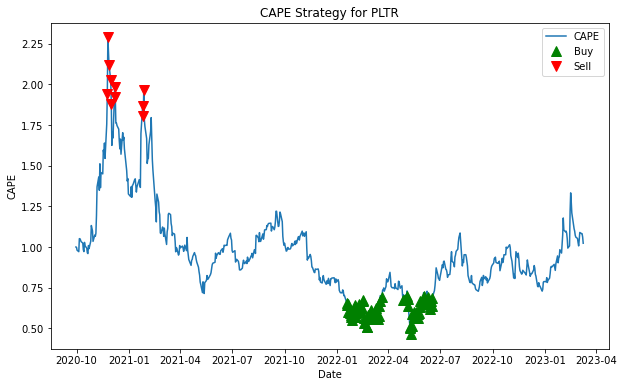

Total profit: $-85.54


In [56]:
plt.figure(figsize=(10,6))
plt.plot(pltr.index, pltr['CAPE'], label='CAPE')
plt.plot(pltr.loc[pltr['Position'] == 1].index, pltr['CAPE'][pltr['Position'] == 1], '^', markersize=10, color='g', label='Buy')
plt.plot(pltr.loc[pltr['Position'] == -1].index, pltr['CAPE'][pltr['Position'] == -1], 'v', markersize=10, color='r', label='Sell')
plt.legend(loc='best')
plt.title('CAPE Strategy for PLTR')
plt.xlabel('Date')
plt.ylabel('CAPE')
plt.show()

#If 10000 got invested using this strategy
pltr = pltr.dropna()
initial_investment = 10000
total_returns = pltr['Cumulative Returns'][-1]
profit = round(total_returns * initial_investment - initial_investment, 2)
print(f"Total profit: ${profit}")